### Student Information
Name : 張正翰

Student ID : 113065538

GitHub ID : Andy109306070

Kaggle name : AndyChang

Kaggle private scoreboard snapshot :

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [ ]:
### Begin Assignment Here

###Environment setup

In [1]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip'

In [2]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling

In [4]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  p

In [5]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be

In [6]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.6.0


###Get Data from Google Drive

In [7]:
#Link to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Get Data
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [9]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [10]:
### testing data
anger_test = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Vectorizing text for train and test datasets
vectorizer4train = CountVectorizer()
vectorizer4test = CountVectorizer()

# Document-term matrices
train_txt_counts = vectorizer4train.fit_transform(train_df['text'])
test_txt_counts = vectorizer4test.fit_transform(test_df['text'])

# Summing word occurrences
train_term_counts = train_txt_counts.sum(axis=0).A1
train_vocab = vectorizer4train.get_feature_names_out()

test_term_counts = test_txt_counts.sum(axis=0).A1
test_vocab = vectorizer4test.get_feature_names_out()

# Creating DataFrames with terms and their frequencies
train_freq_df = pd.DataFrame({'word': train_vocab, 'frequency': train_term_counts})
test_freq_df = pd.DataFrame({'word': test_vocab, 'frequency': test_term_counts})

# Sorting and selecting the top 30 most frequent words
train_top30 = train_freq_df.sort_values(by='frequency', ascending=False).head(30)
test_top30 = test_freq_df.sort_values(by='frequency', ascending=False).head(30)

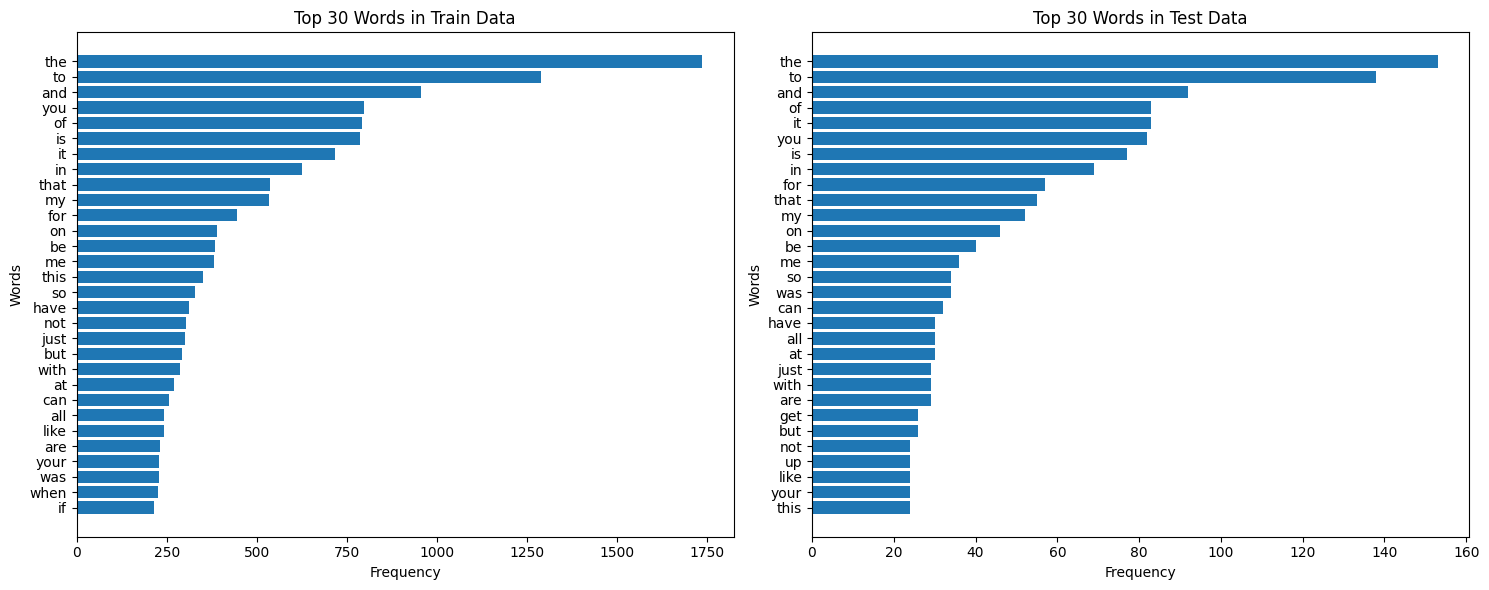

In [ ]:
# Plotting
plt.figure(figsize=(15, 6))

# Plotting for train data
plt.subplot(1, 2, 1)
plt.barh(train_top30['word'], train_top30['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Words in Train Data')
plt.gca().invert_yaxis()

# Plotting for test data
plt.subplot(1, 2, 2)
plt.barh(test_top30['word'], test_top30['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Words in Test Data')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt_tab')

# build analyzers
vectorizer_ex2 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
train_data_tfidf_features_1000 = vectorizer_ex2.fit_transform(train_df['text'])

# observe some feature names
feature_names_1000 = vectorizer_ex2.get_feature_names_out()
feature_names_1000[100:110]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results below? What do they mean?

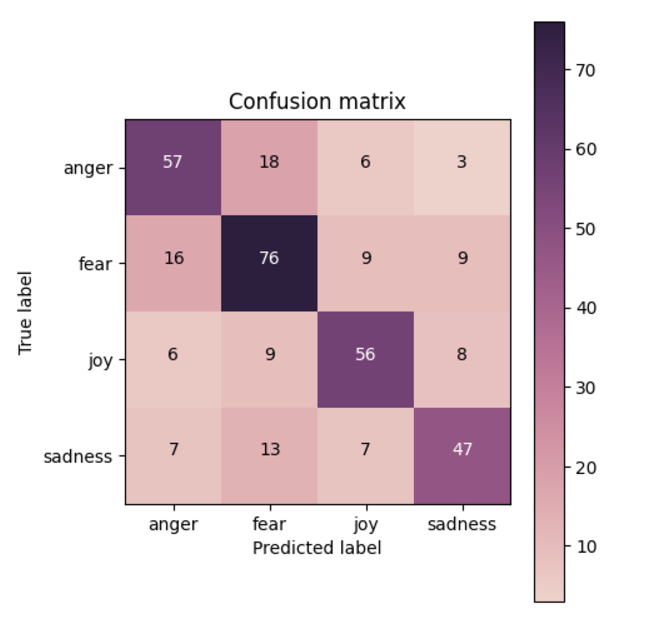

Diagonal cells (anger-anger, fear-fear, joy-joy, sadness-sadness):

These represent correct classifications, where the model’s prediction matches the true label.

"Anger" was correctly classified 57 times.

"Fear" was correctly classified 76 times.

"Joy" was correctly classified 56 times.

"Sadness" was correctly classified 47 times.

---
Off-diagonal cells:

These represent misclassifications, where the model’s prediction does not match the true label.

For example:

"Anger" was misclassified as "Fear" 18 times.

"Sadness" was misclassified as "Joy" 7 times.

"Joy" was misclassified as "Sadness" 8 times.

---

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer_ex4 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

X_train = vectorizer_ex4.fit_transform(train_df['text'])
y_train = train_df['emotion']

X_test = vectorizer_ex4.transform(test_df['text'])
y_test = test_df['emotion']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Initialize the MultinomialNB model and train it
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()


Classification Report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



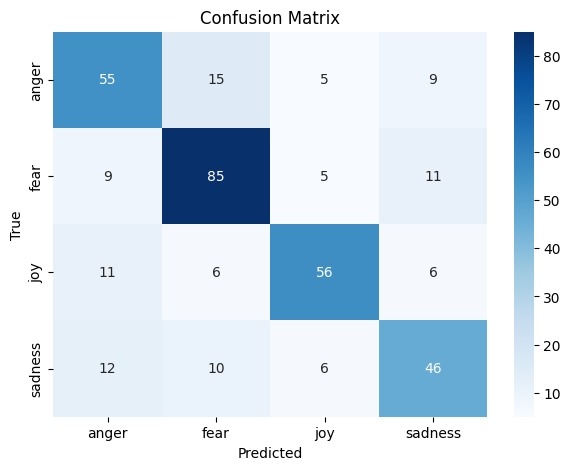

In [ ]:
# Predict on the test set and evaluate it
y_pred = nb_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Class-wise Strengths:

*   Naive Bayes : Shows higher precision for "Fear" but struggles more with other emotional classes like "Anger" and "Sadness."

*   Decision Tree : Balances predictions across most classes but struggles slightly with "Fear," showing more confusion between "Anger" and "Fear."

---
Error Distribution:

*   The Naive Bayes model : more distributed misclassifications

*   Decision Tree : localized errors (e.g., "Anger" misclassified as "Fear" mainly).

---
*   Model Simplicity : Naive Bayes relies on probabilistic assumptions and tends to perform better when there are strong feature-label correlations (like "Fear"). However, it lacks flexibility to adapt to subtle, complex relationships that Decision Trees capture.

*   Feature Dependence : Decision Trees do not assume feature independence, allowing them to model overlapping features in emotional categories. This leads to fewer distributed errors but higher sensitivity to localized misclassifications.

*   Generalization vs Overfitting : Naive Bayes generalizes well but struggles with nuanced differences. Decision Trees may overfit to the training data, capturing specific patterns but potentially misclassifying edge cases.




---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true)


![pic4.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true)

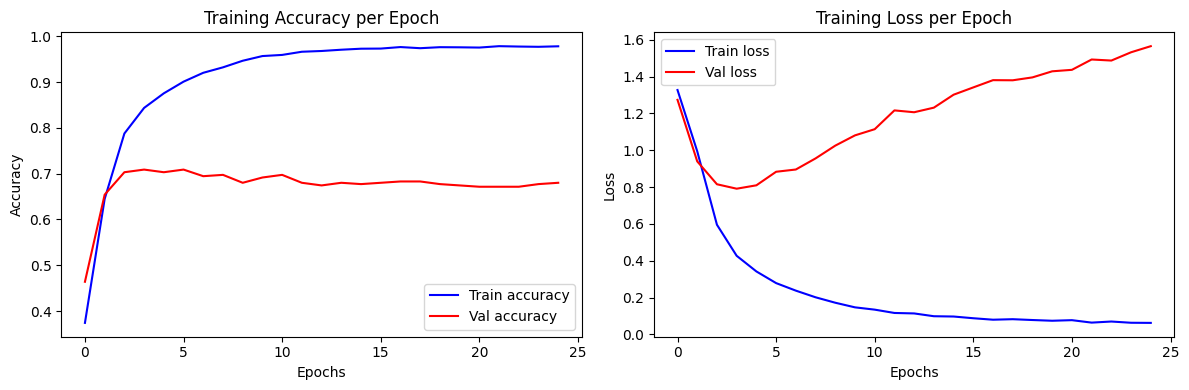

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

training_log = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/logs/training_log.csv")

# Adjusting the figsize and placing the two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Training and Validation Accuracy
axs[0].plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
axs[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
axs[0].set_title('Training Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Training and Validation Loss
axs[1].plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
axs[1].plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
axs[1].set_title('Training Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

*   Training Accuracy : Measures how well the model is performing on the training data.
*   Validation Accuracy : Measures how well the model is performing on unseen validation data.

---
*   Training Loss : Measures how well the model minimizes the error on the training data.
*   Validation Loss : Measures how well the model minimizes the error on unseen validation data.

---
Signs of Overfitting

*   Accuracy plot : Training accuracy improves significantly over epochs, but validation accuracy stagnates or decreases slightly after an initial rise. This suggests the model may be overfitting.
*   Loss plot : Training loss decreases steadily, but validation loss starts increasing after some epochs. This divergence confirms overfitting.

---
Signs of Underfitting

*   The training accuracy and validation accuracy would both remain low.
*   The training and validation losses would remain high and not show improvement over epochs.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?

1.  Simple Aggregation Methods
  * Compute the "average"/"sum"/"Max" of all word vectors in the sentence

2.  Weighted Aggregation Methods
  * Weight each word vector by its TF-IDF score
  * Attention Mechanisms

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [ ]:
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

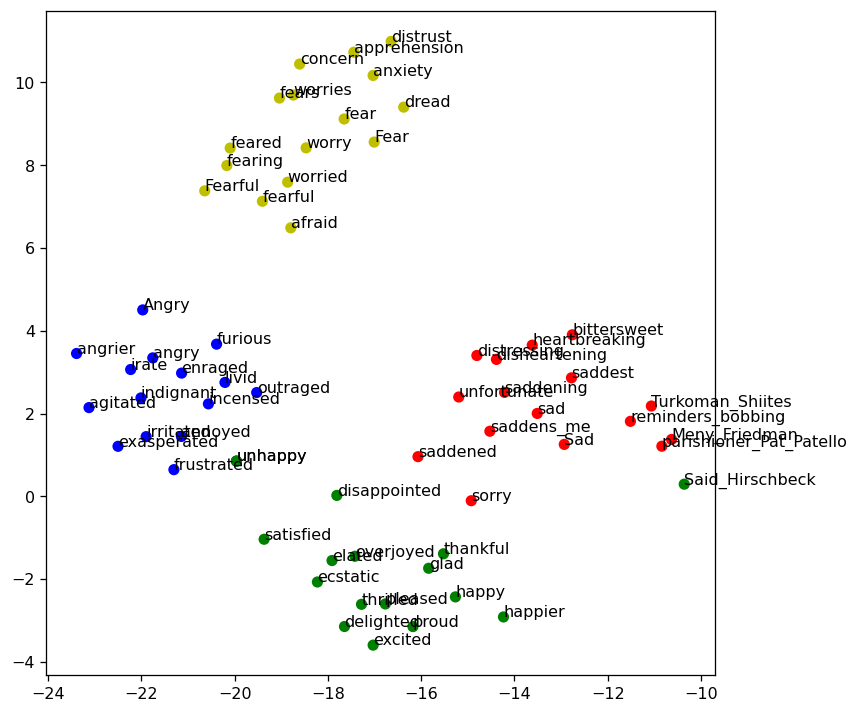

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


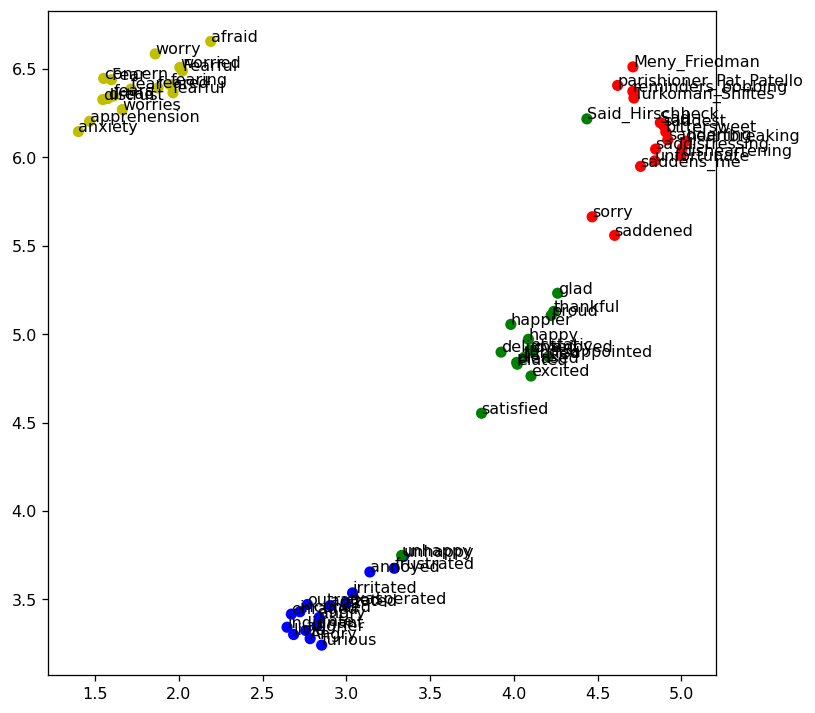

In [ ]:
import matplotlib.pyplot as plt
import umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

* Judging from the TSNE graph, the distribution between the same categories is looser, and the distribution between different categories is denser.

* Judging from the UMAP diagram, the distribution between the same categories is denser, and the distribution between different categories is looser.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

The primary roles are:

*  user : Represents the end-user interacting with the model. Messages with this role are the inputs or questions posed by the user.

*  assistant : Represents the AI model's responses. Messages with this role are the outputs generated by the model in response to the user's inputs.

*  system : Provides context or instructions to guide the model's behavior throughout the conversation. This role is used to set the initial context or rules for the assistant.

*  function : Represents outputs from external functions or tools that the assistant can call during the conversation. This role is used when the assistant invokes a function to retrieve information or perform a task.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2:1b', messages=[
    {
        'role': 'system',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

<|start_header_id|>assistant<|end_header_id|>

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to analyze and extract valuable information from data.

## Key Concepts
---------------

*   **Databases**: Collections of organized data stored in a structured format.
*   **Data Preprocessing**: Cleaning, transforming, and preparing data for analysis.
*   **Feature Engineering**: Selecting and manipulating variables to improve the accuracy of models.
*   **Algorithm Selection**: Choosing the most suitable machine learning algorithms for the problem at hand.

## Types of Data Mining
----------------------

1.  **Supervised Learning**: Training a model on labeled data to predict outcomes.
2.  **Unsupervised Learning**: Discovering patterns and relationships in unlabeled data.
3.  **Reinforcement Learning**: Training an agent to take actions to maxim

In [ ]:
from IPython.display import display, Markdown, Latex

display(Markdown(response['message']['content']))

<|start_header_id|>assistant<|end_header_id|>

# Data Mining
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to analyze and extract valuable information from data.

## Key Concepts
---------------

*   **Databases**: Collections of organized data stored in a structured format.
*   **Data Preprocessing**: Cleaning, transforming, and preparing data for analysis.
*   **Feature Engineering**: Selecting and manipulating variables to improve the accuracy of models.
*   **Algorithm Selection**: Choosing the most suitable machine learning algorithms for the problem at hand.

## Types of Data Mining
----------------------

1.  **Supervised Learning**: Training a model on labeled data to predict outcomes.
2.  **Unsupervised Learning**: Discovering patterns and relationships in unlabeled data.
3.  **Reinforcement Learning**: Training an agent to take actions to maximize rewards.

## Applications of Data Mining
------------------------------

*   **Recommendation Systems**: Personalized product suggestions based on user behavior.
*   **Customer Segmentation**: Grouping customers by demographic, behavioral, or transactional characteristics.
*   **Predictive Analytics**: Forecasting future events or outcomes based on historical data.
*   **Risk Analysis**: Identifying potential risks and vulnerabilities in financial transactions.

## Data Mining Techniques
-------------------------

1.  **Classification**: Classifying data into predefined categories.
2.  **Clustering**: Grouping similar data points together.
3.  **Regression**: Predicting continuous outcomes based on input variables.
4.  **Decision Trees**: Using tree-like models to classify or predict data.

## Benefits of Data Mining
---------------------------

*   **Improved Decision-Making**: Data mining provides insights that can inform business decisions.
*   **Increased Efficiency**: Automating processes and reducing manual labor.
*   **Enhanced Customer Experience**: Personalized recommendations and improved user interactions.

## Challenges of Data Mining
---------------------------

1.  **Data Quality Issues**: Handling missing or inaccurate data.
2.  **Overfitting**: Training models that are too complex for the problem at hand.
3.  **Scalability**: Handling large datasets and distributed computing requirements.

## Conclusion
----------

Data mining is a powerful tool for extracting insights from large datasets. By applying various techniques and algorithms, businesses can improve decision-making, increase efficiency, and enhance customer experiences. However, data mining also presents challenges that must be addressed to ensure successful implementation.
### Code Example: Exploring a Simple Dataset using Pandas

```python
import pandas as pd

# Load the dataset into a DataFrame
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Seattle'],
    'Population': [8531677, 3990456, 2690271, 2330614, 7300000],
    'Area': [302.6, 468.2, 603.5, 231.8, 716.4]
}

df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
print(df.head())

# Explore the data using summary statistics and plot a bar chart for population density
print("\nSummary Statistics:")
print(df.describe())
print("\nBar Chart: Population Density")
df['Area'].value_counts().plot(kind='bar')
plt.title('Population Density by City')
plt.xlabel('City')
plt.ylabel('Population Density (people per km²)')
plt.show()
```

This code example demonstrates how to load a dataset into a pandas DataFrame, explore the data using summary statistics and plot a bar chart for population density.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

![clownfish.jpg](https://tomorrowsci.com/wp-content/uploads/2024/02/Clownfish-Art-Concept-Illustration-1140x760.jpg)
source: https://tomorrowsci.com/animals/20240224_01/

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ["/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Homework/clownfish.jpg"] #Image with the clownfish
    },
])

display(Markdown(response2['message']['content']))

The image captures a delightful scene from the underwater world. Dominating the frame is an orange clownfish, its vibrant hues contrasting beautifully with the surrounding yellow coral. The fish, characterized by a white stripe on its side and black fins, appears to be in motion, swimming past the coral. It's not alone though; there are two small white plastic pieces nearby, possibly remnants of an earlier exploration or playful interaction with other marine life. The background is intentionally blurred, drawing focus to the clownfish and its immediate surroundings while suggesting a larger, unseen world beyond this captured moment.

This description is generally correct, only the sentence describing two pieces of plastic is more difficult to understand. It should be because there are similar components in the picture, which caused the model to misunderstand


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [14]:
import ollama
import bs4
from IPython.display import Markdown, display
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load content from the URL
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)  # Split the documents
        all_splits.extend(splits)  # Collect splits from all URLs

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)  # Create vector store
    return vectorstore.as_retriever()

# List of URLs
urls = [
    "https://www.ibm.com/topics/data-mining",
    "https://www.ibm.com/topics/ddos",
    "https://www.ibm.com/topics/quantum-computing"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

# Function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format retrieved documents for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)  # Retrieve relevant documents based on the question
    formatted_context = format_docs(retrieved_docs)  # Format the retrieved documents
    return ollama_llm(question, formatted_context)  # Use the LLM to generate an answer

source: https://www.ibm.com/topics/data-mining

source: https://www.ibm.com/topics/ddos

source: https://www.ibm.com/topics/quantum-computing

In [15]:
# Use the RAG chain
result1 = rag_chain("What are the industry using cases related to data mining?")
display(Markdown(result1))

Based on the provided context, here are some industry-specific use cases related to data mining:

1. **Customer Segmentation**: Retailers can use data mining to segment their customers based on their purchasing behavior, demographics, and preferences, allowing for targeted marketing campaigns.
2. **Predictive Maintenance**: Manufacturing companies can use predictive analytics to analyze equipment performance data, identify potential failures, and schedule maintenance to minimize downtime.
3. **Credit Risk Assessment**: Banks can use data mining to analyze customer credit history, income, and other factors to predict the likelihood of defaulting on loans.
4. **Medical Diagnosis**: Healthcare organizations can use data mining to analyze patient medical records, symptoms, and test results to identify patterns and make accurate diagnoses.
5. **Supply Chain Optimization**: Companies can use data mining to analyze supply chain operations, demand forecasting, and inventory management to optimize logistics and reduce costs.
6. **Employee Performance Analysis**: Human resources departments can use data mining to analyze employee performance metrics, such as productivity, attendance, and training history, to identify areas for improvement.
7. **Market Basket Analysis**: Retailers can use data mining to analyze customer purchasing behavior and identify patterns and trends in market basket analysis to optimize product placement and inventory management.
8. **Fraud Detection**: Financial institutions can use data mining to detect and prevent financial fraud by analyzing transaction patterns, account activity, and other relevant data.

These are just a few examples of industries that can benefit from data mining and predictive analytics. The applications of data mining are vast and continue to grow as more organizations realize the value of extracting insights from their data.

In [18]:
result2 = rag_chain("What attacking types does DDoS attacks have?")
display(Markdown(result2))

DDoS (Distributed Denial of Service) attacks have several attacking types, including:

1. Smurf attack: This type of attack involves sending an ICMP echo request from a spoofed IP address to an IP broadcast network, which forwards the request to multiple devices on the network, causing them to respond and flood the victim's device with traffic.

2. Other types are not explicitly mentioned in the given text, however.

In [17]:
result3 = rag_chain("What are the differences between quantum and classical computing?")
display(Markdown(result3))

The text describes the main differences between quantum and classical computing:

1. **Processing multiple paths**: Quantum computers do not test multiple paths simultaneously, unlike the analogy suggests (the bird's-eye view). Instead, they measure the probability amplitudes of qubits to determine an outcome. These probabilities function like waves, overlapping and interfering with each other.

2. **Wave-like behavior**: The amplitudes used in quantum computing are wave-like, overlapping and interfering with each other when asynchronous waves overlap. This leads to a reduction in possible solutions to complex problems.

3. **Classical computation vs brute force**: Classical supercomputers try to simulate molecular behavior by exploring every possible way a part of the molecule might behave using many processors. However, this approach stalls as the complexity increases and available working memory is not sufficient to handle all permutations.

4. **Quantum algorithms for complex problems**: Quantum algorithms take a different approach to solving complex problems like chemical simulations. They create multidimensional computational spaces or run calculations that mimic molecular behavior, making them more efficient than classical supercomputers in these cases.

In summary, quantum computing uses wave-like probability amplitudes and creates multidimensional computational spaces to efficiently solve complex problems, whereas classical computing relies on brute force exploration of possible outcomes.

The correct answer rate for these three questions is about half and half. They all answered the questions but were incomplete. A lot of information that can be found on the corresponding website has not been well captured.

---
Advantages of RAG:
*  Improved Knowledge Scope : It augment generative models by retrieving relevant, up-to-date, and domain-specific information from external sources, reducing reliance on pre-trained static knowledge.

*  Reduced Hallucination : By grounding responses in retrieved documents, RAG systems are less prone to generating fabricated information, which is a common issue with purely generative models.

Disadvantages of RAG:
*  Dependency on Retrieval Quality : The system’s performance is heavily reliant on the quality and completeness of the retrieved documents. Poor retrieval results in suboptimal or misleading responses.

*  Increased Latency : The retrieval step adds extra processing time, potentially slowing down response generation compared to standalone generative models.

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

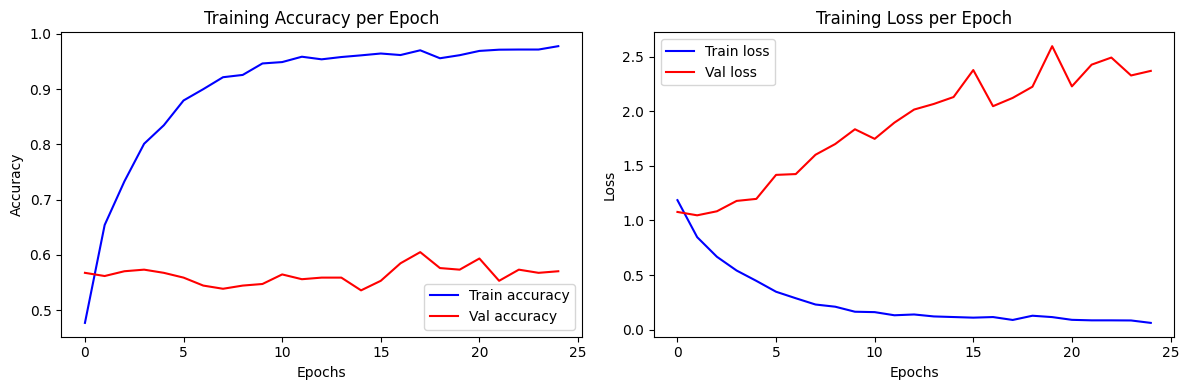

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

training_log_2 = pd.read_csv("/content/drive/MyDrive/碩一上/Data Mining/DM2024-Lab2-Master/logs/training_log_2.csv")

# Adjusting the figsize and placing the two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Training and Validation Accuracy
axs[0].plot(training_log_2['epoch'], training_log_2['accuracy'], label='Train accuracy', color='blue')
axs[0].plot(training_log_2['epoch'], training_log_2['val_accuracy'], label='Val accuracy', color='red')
axs[0].set_title('Training Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Training and Validation Loss
axs[1].plot(training_log_2['epoch'], training_log_2['loss'], label='Train loss', color='blue')
axs[1].plot(training_log_2['epoch'], training_log_2['val_loss'], label='Val loss', color='red')
axs[1].set_title('Training Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

EX12 here uses LLM Embeddings to convert the entire sentence of TEXT into a vector; while EX6 uses the Bag Of Word method to convert each word into a vector and make predictions based on its position and frequency of occurrence in space. In terms of data, the latter has a higher accuracy rate.

---
Reason:
*  BoW focuses on exact word occurrences and frequency, making it highly effective for tasks where individual word presence is a strong indicator of the output, such as sentiment analysis, or text classification with clearly defined word patterns.

*  Embeddings encode semantic meaning and relationships between words. While this is beneficial for tasks requiring deeper understanding, it may introduce noise for tasks that rely on literal text characteristics rather than semantic relationships.

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

*  Zero-shot classification achieves baseline performance and is computationally the most efficient as it avoids constructing lengthy prompts.
*  1-shot classification improves accuracy slightly by introducing minimal guidance and requires slightly more resources but balances efficiency and effectiveness.
*  5-shot classification maximizes accuracy by offering comprehensive examples for context and requires significant computational resources to handle longer prompts.